<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 02 - Implement a Selection Sort Algorithm 

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline 

np.random.seed(seed = 123)

### Mount Google Drive to Colab Environment

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Finds the smallest value in an array

In [2]:
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index



### Sort array

In [3]:
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

### Define Simplesort

In [4]:
def simpleSort(arr):
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
                
    return arr

### Create arrays and set seed for reproducible results

In [5]:
arr1 = list(np.random.randint(99999, size = 5000))
arr2 = list(np.random.randint(99999, size = 10000))
arr3 = list(np.random.randint(99999, size = 15000))
arr4 = list(np.random.randint(99999, size = 20000))
arr5 = list(np.random.randint(99999, size = 25000))

### Execute SimpleSort and Selection Sort on Arrays while Keeping Time

In [6]:
arrays = [arr1, arr2, arr3, arr4, arr5]    
times_simple_sort = []    
    
for i in range(len(arrays)):
    start = time.clock()
    simpleSort(arrays[i])
    end = time.clock()
    times_simple_sort.append((end - start) * 1000)

arrays = [arr1, arr2, arr3, arr4, arr5]
times_selection_sort = []

for i in range(len(arrays)):
    start = time.clock()
    selectionSort(arrays[i])
    end = time.clock()
    times_selection_sort.append((end - start) * 1000)

### Create and view dataframe with results from Sorting Methods

In [7]:
df_times = pd.DataFrame(
    {'Length': [5000, 10000, 15000, 20000, 25000],
     'Simple Sort': times_simple_sort,
     'Selection Sort': times_selection_sort
    })

df_times

,Length,Simple Sort,Selection Sort
0,5000,1755.188,779.048
1,10000,6846.291,3102.091
2,15000,15349.601,7104.558
3,20000,27076.150,12579.003
4,25000,42254.478,19735.810


### Plot Execution Times

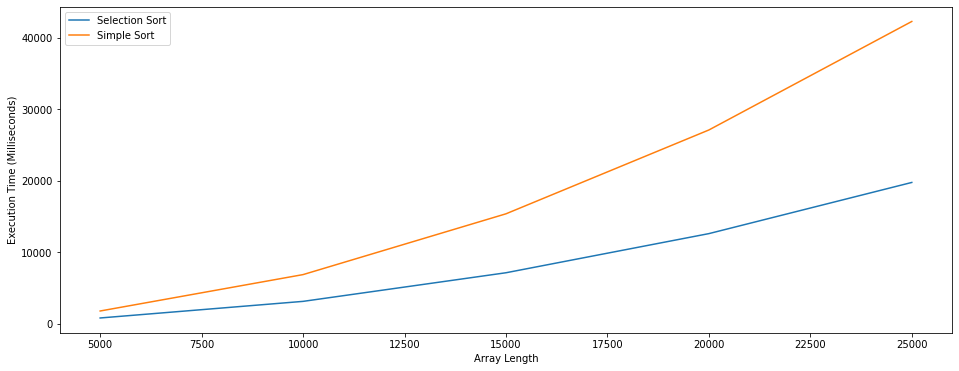

In [9]:
plt.figure(figsize=(16, 6))
ax = plt.gca()
df_times.plot(x='Length',y='Selection Sort',ax=ax)
df_times.plot(x='Length',y='Simple Sort', ax=ax)
plt.xlabel('Array Length')
plt.ylabel('Execution Time (Milliseconds)')

plt.show()